In [1]:
# Import Libraries and Modules used for class
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml
import seaborn
import statsmodels
import patsy
import requests
from datetime import datetime, timedelta
import requests
import json

# Milestone 4 (Weeks 9 & 10)

Perform at least 5 data transformation and/or cleansing steps to your API data. For example:
  
Replace Headers  
Format data into a more readable format  
Identify outliers and bad data  
Find duplicates  
Fix casing or inconsistent values  
Conduct Fuzzy Matching  
  
You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Milestone 4 is due Sunday, by Midnight of Week 10. Refer to the rubric for more grading detail.

In [2]:
# Event listing API, Use this request/get to find WTS Grand Final, 
# held in Lausanne, Switzerland 29 Aug - 01 Sep, 2019, hard code date into query
url = "https://api.triathlon.org/v1/events"

querystring = {"per_page":"10","order":"asc","start_date":"2019-08-29"} #query date of event

headers = {'apikey': 'b3ac300d2569a3eda2b3ce45c054d6e2'}

response1 = requests.request("GET", url, headers=headers, params=querystring)

#print(response1.text), comment out due to length

#found "event_id":127488

In [3]:
# determine the programs listed under the event ID, programs are the individual races or 'waves'
#url = "https://api.triathlon.org/v1/events/event_id/programs", hardcode the event_id into the URL
url = "https://api.triathlon.org/v1/events/127488/programs"

headers = {'apikey': 'b3ac300d2569a3eda2b3ce45c054d6e2'}

response2 = requests.get(url, headers=headers).json()

#print(response2), comment out due to length

In [4]:
# create a dataframe for the World Triatlon Series final info from the response/get 
wts=pd.DataFrame.from_dict(response2['data'])

In [5]:
wts

,prog_id,event_id,prog_name,prog_date,prog_time,prog_notes,results,team
0,347222,127488,Head of Delegation,2019-08-30,None,None,False,False
1,337810,127488,Elite Coaches,2019-08-31,None,None,False,False
2,337811,127488,Elite Men,2019-08-31,None,Technical delegate: Hugh McAtamney/IRL. Head r...,True,False
3,337812,127488,Elite Women,2019-08-31,None,Technical delegate: Hugh McAtamney/IRL. Head r...,True,False
4,337813,127488,U23 Coaches,2019-08-30,None,None,False,False
...,...,...,...,...,...,...,...,...
83,347550,127488,80-84 Male AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False
84,347551,127488,85-89 Male AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False
85,337835,127488,Technical Officials,2019-08-30,None,None,False,False
86,347226,127488,NF AG Medicals,2019-08-31,None,None,False,False


In [6]:
wts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prog_id     88 non-null     int64 
 1   event_id    88 non-null     int64 
 2   prog_name   88 non-null     object
 3   prog_date   88 non-null     object
 4   prog_time   0 non-null      object
 5   prog_notes  77 non-null     object
 6   results     88 non-null     bool  
 7   team        88 non-null     bool  
dtypes: bool(2), int64(2), object(4)
memory usage: 4.4+ KB


In [7]:
# some of the programs listed don't have results, below code drops those without 'results', bool
wts = wts[wts.results == True]

In [8]:
# confirm dropped the non-race programs, or those without results
wts

,prog_id,event_id,prog_name,prog_date,prog_time,prog_notes,results,team
2,337811,127488,Elite Men,2019-08-31,None,Technical delegate: Hugh McAtamney/IRL. Head r...,True,False
3,337812,127488,Elite Women,2019-08-31,None,Technical delegate: Hugh McAtamney/IRL. Head r...,True,False
5,337814,127488,U23 Men,2019-08-30,None,Technical delegate: Thomas Mantelli/FRA. Head ...,True,False
6,337815,127488,U23 Women,2019-08-30,None,Technical delegate: Thomas Mantelli/FRA. Head ...,True,False
8,337817,127488,Junior Men,2019-08-30,None,Technical delegate: Michael Kurth/SUI. Head re...,True,False
...,...,...,...,...,...,...,...,...
80,347547,127488,75-79 Female AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False
81,347548,127488,75-79 Male AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False
82,347549,127488,80-84 Female AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False
83,347550,127488,80-84 Male AG,2019-09-01,None,Technical delegate: Bex Stubbings/GBR. Head re...,True,False


In [9]:
# create a list from the program IDs
prog_id_lst2 = wts.prog_id.to_list()
prog_name_lst = wts.prog_name.to_list()

In [10]:
#list of pro, u23, and AG olypmic events
prog_id_lst = [337811,
337812,
337814,
337815,
347523,
347524,
347525,
347526,
347527,
347528,
347530,
347529,
347531,
347532,
347533,
347534,
347535,
347536,
347537,
347538,
347539,
347540,
347541,
347542,
347543,
347544,
347545,
347546,
347547,
347548,
347549,
347550,
347551]

In [11]:
#prog_id_lst #comment out due to length

In [12]:
#prog_name_lst

In [13]:
#get program results, from just the elite men, testing things out here
#url = "https://api.triathlon.org/v1/events/127488/programs/prog_id/results"
url = "https://api.triathlon.org/v1/events/127488/programs/337811/results"
headers = {'apikey': 'b3ac300d2569a3eda2b3ce45c054d6e2'}
response3 = requests.request("GET", url, headers=headers).json()

#print(response3.text), comment out due to length

In [14]:
# print just the results data from the elite men JSON data request
print(response3['data']['results'])

[{'athlete_id': 41322, 'athlete_title': 'Kristian Blummenfelt', 'athlete_slug': 'kristian_blummenfelt', 'athlete_edit_date': '2020-01-30T18:01:19+00:00', 'athlete_first': 'Kristian', 'athlete_last': 'Blummenfelt', 'athlete_country_id': 236, 'athlete_gender': 'male', 'athlete_yob': '1994', 'validated': True, 'athlete_profile_image': 'http://www.triathlon.org/images/athlete_thumbs/kristian_blummenfelt_NOR.jpg', 'athlete_noc': 'NOR', 'athlete_country_name': 'Norway', 'athlete_country_isoa2': 'NO', 'athlete_listing': 'https://www.triathlon.org/athletes/profile/41322/kristian_blummenfelt', 'athlete_flag': 'https://f9ca11ef49c28681fc01-0acbf57e00c47a50e70a1acb89e86c89.ssl.cf1.rackcdn.com/images/icons/no.png', 'athlete_api_listing': 'https://api.triathlon.org/v1/v1/athletes/41322', 'athlete_categories': [42], 'splits': ['00:18:12', '00:00:39', '01:00:46', '00:00:26', '00:30:46'], 'result_id': 819927, 'position': 1, 'total_time': '01:50:47', 'start_num': 19}, {'athlete_id': 11402, 'athlete_tit

In [15]:
# create a dataframe from just the elite men results
wts123=pd.DataFrame.from_dict(response3['data']['results'])

In [16]:
# review dataframe from just the elite men results, confirming on the right track
wts123.head()

,athlete_id,athlete_title,athlete_slug,athlete_edit_date,athlete_first,athlete_last,athlete_country_id,athlete_gender,athlete_yob,validated,...,athlete_country_isoa2,athlete_listing,athlete_flag,athlete_api_listing,athlete_categories,splits,result_id,position,total_time,start_num
0,41322,Kristian Blummenfelt,kristian_blummenfelt,2020-01-30T18:01:19+00:00,Kristian,Blummenfelt,236,male,1994,True,...,NO,https://www.triathlon.org/athletes/profile/413...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/41322,[42],"[00:18:12, 00:00:39, 01:00:46, 00:00:26, 00:30...",819927,1,01:50:47,19
1,11402,Mario Mola,mario_mola,2020-03-02T23:28:03+00:00,Mario,Mola,270,male,1990,True,...,ES,https://www.triathlon.org/athletes/profile/114...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/11402,"[42, 539]","[00:18:23, 00:00:38, 01:00:36, 00:00:26, 00:31...",819928,2,01:51:03,2
2,29442,Fernando Alarza,fernando_alarza,2020-03-02T23:27:57+00:00,Fernando,Alarza,270,male,1991,True,...,ES,https://www.triathlon.org/athletes/profile/294...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/29442,"[42, 539]","[00:18:30, 00:00:37, 01:00:31, 00:00:24, 00:31...",819929,3,01:51:18,4
3,47630,Gustav Iden,gustav_iden,2020-02-27T15:15:57+00:00,Gustav,Iden,236,male,1996,False,...,NO,https://www.triathlon.org/athletes/profile/476...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/47630,[42],"[00:18:28, 00:00:38, 01:00:32, 00:00:25, 00:31...",819930,4,01:51:34,15
4,11143,Vincent Luis,vincent_luis,2020-01-31T12:19:42+00:00,Vincent,Luis,166,male,1989,True,...,FR,https://www.triathlon.org/athletes/profile/111...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/11143,[42],"[00:18:06, 00:00:39, 01:00:53, 00:00:25, 00:31...",819931,5,01:51:53,1


In [17]:
# Use the above process to loop requests using the progam ID list into a dataframe
wtswc19 = pd.DataFrame() # stores responses for results

#loop using the program IDs identified above and append to the DF, adjust the URL for each program ID
for result in prog_id_lst:
   headers = {'apikey': 'b3ac300d2569a3eda2b3ce45c054d6e2'}
   response4 = requests.get('https://api.triathlon.org/v1/events/127488/programs/{}'.format(result)+'/results',headers=headers).json()
   wts456=pd.DataFrame.from_dict(response4['data']['results'])
   wtswc19 = wtswc19.append(wts456)

In [18]:
wtswc19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 0
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   athlete_id             2187 non-null   int64 
 1   athlete_title          2187 non-null   object
 2   athlete_slug           2187 non-null   object
 3   athlete_edit_date      1983 non-null   object
 4   athlete_first          2187 non-null   object
 5   athlete_last           2187 non-null   object
 6   athlete_country_id     2187 non-null   int64 
 7   athlete_gender         2187 non-null   object
 8   athlete_yob            2187 non-null   object
 9   validated              2187 non-null   bool  
 10  athlete_profile_image  175 non-null    object
 11  athlete_noc            2187 non-null   object
 12  athlete_country_name   2187 non-null   object
 13  athlete_country_isoa2  2187 non-null   object
 14  athlete_listing        2187 non-null   object
 15  athlete_flag           2

In [19]:
wtswc19

,athlete_id,athlete_title,athlete_slug,athlete_edit_date,athlete_first,athlete_last,athlete_country_id,athlete_gender,athlete_yob,validated,...,athlete_country_isoa2,athlete_listing,athlete_flag,athlete_api_listing,athlete_categories,splits,result_id,position,total_time,start_num
0,41322,Kristian Blummenfelt,kristian_blummenfelt,2020-01-30T18:01:19+00:00,Kristian,Blummenfelt,236,male,1994,True,...,NO,https://www.triathlon.org/athletes/profile/413...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/41322,[42],"[00:18:12, 00:00:39, 01:00:46, 00:00:26, 00:30...",819927,1,01:50:47,19
1,11402,Mario Mola,mario_mola,2020-03-02T23:28:03+00:00,Mario,Mola,270,male,1990,True,...,ES,https://www.triathlon.org/athletes/profile/114...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/11402,"[42, 539]","[00:18:23, 00:00:38, 01:00:36, 00:00:26, 00:31...",819928,2,01:51:03,2
2,29442,Fernando Alarza,fernando_alarza,2020-03-02T23:27:57+00:00,Fernando,Alarza,270,male,1991,True,...,ES,https://www.triathlon.org/athletes/profile/294...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/29442,"[42, 539]","[00:18:30, 00:00:37, 01:00:31, 00:00:24, 00:31...",819929,3,01:51:18,4
3,47630,Gustav Iden,gustav_iden,2020-02-27T15:15:57+00:00,Gustav,Iden,236,male,1996,False,...,NO,https://www.triathlon.org/athletes/profile/476...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/47630,[42],"[00:18:28, 00:00:38, 01:00:32, 00:00:25, 00:31...",819930,4,01:51:34,15
4,11143,Vincent Luis,vincent_luis,2020-01-31T12:19:42+00:00,Vincent,Luis,166,male,1989,True,...,FR,https://www.triathlon.org/athletes/profile/111...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/11143,[42],"[00:18:06, 00:00:39, 01:00:53, 00:00:25, 00:31...",819931,5,01:51:53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,108728,Kuninobu Tanaka,kuninobu_tanaka,2016-08-12T14:27:49+00:00,Kuninobu,Tanaka,192,male,1938,False,...,JP,https://www.triathlon.org/athletes/profile/108...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/108728,[42],"[00:47:29, 00:06:44, 01:46:59, 00:06:16, 01:40...",822482,3,04:27:43,21600
3,76943,Bob Palmatier,bob_palmatier,2013-08-16T22:19:02+00:00,Bob,Palmatier,293,male,1937,False,...,US,https://www.triathlon.org/athletes/profile/769...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/76943,[42],"[01:10:04, 00:06:19, 01:43:26, 00:04:35, 01:30...",822483,4,04:34:55,21597
4,120767,Takeshi Saitoh,takeshi_saitoh,2017-08-20T14:59:56+00:00,Takeshi,Saitoh,192,male,1935,False,...,JP,https://www.triathlon.org/athletes/profile/120...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/120767,[42],"[01:03:10, 00:07:04, 01:58:52, 00:06:47, 00:00...",822484,DNF,DNF,21599
5,8005,Lachlan Lewis,lachlan_lewis,None,Lachlan,Lewis,111,male,1937,False,...,AU,https://www.triathlon.org/athletes/profile/800...,https://f9ca11ef49c28681fc01-0acbf57e00c47a50e...,https://api.triathlon.org/v1/v1/athletes/8005,[42],"[01:28:48, 00:07:58, 00:00:00, 00:00:00, 00:00...",822485,DNF,DNF,21598


In [20]:
# Data transformation - the race splits are all in a single column
#create new DF w/ just the splits data, as series
splits = wtswc19['splits'].apply(pd.Series)

In [21]:
# splits the splits in new columns
splits = splits.rename(columns = lambda x : 'split_' + str(x))

In [22]:
# add the splits splitted into original DF
wtswc19 = pd.concat([wtswc19[:],splits[:]],axis=1)

In [23]:
# Data transformation
# change column names
wtswc19 = wtswc19.rename(columns={'position':'Place','athlete_title':'Name','athlete_noc':'Country',
                                  'split_0':'Swim','split_1':'T1','split_2':'Bike','split_3':'T2',
                                  'split_4':'Run','athlete_first':'FName','athlete_last':'LName',
                                  'athlete_gender':'Gender','total_time':'Total'})

In [24]:
# Data transformation, drop the old splits column
wtswc19.drop(labels=['splits'],axis=1,inplace=True)

In [25]:
# Data transformation
# change gender to Male & Female
wtswc19['Gender'].replace(['female','male'],['Female','Male'], inplace=True)

In [26]:
# Data transformation
# rearrange the columns and include only those needed
wtswc19 = wtswc19[['Place',
                   'Name',
                   'FName',
                   'LName',
                   'Country',
                   'Gender',
                   'Swim',
                   'T1',
                   'Bike',
                   'T2',
                   'Run',
                   'Total']]

In [27]:
#wtswc19

In [28]:
#wtswc19.info()

In [29]:
# check for null values
wtswc19.isnull().sum()

Place      0
Name       0
FName      0
LName      0
Country    0
Gender     0
Swim       0
T1         0
Bike       0
T2         0
Run        0
Total      0
dtype: int64

In [30]:
# review the records with null values, they provide no value, will discard
wtswc19[wtswc19.isna().any(axis=1)]

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total


In [31]:
# remove records with n/a
wtswc19 = wtswc19.dropna(how='any',axis=0) 

In [32]:
wtswc19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 0
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    2187 non-null   object
 1   Name     2187 non-null   object
 2   FName    2187 non-null   object
 3   LName    2187 non-null   object
 4   Country  2187 non-null   object
 5   Gender   2187 non-null   object
 6   Swim     2187 non-null   object
 7   T1       2187 non-null   object
 8   Bike     2187 non-null   object
 9   T2       2187 non-null   object
 10  Run      2187 non-null   object
 11  Total    2187 non-null   object
dtypes: object(12)
memory usage: 222.1+ KB


In [33]:
#confirm removed
wtswc19.isnull().sum()

Place      0
Name       0
FName      0
LName      0
Country    0
Gender     0
Swim       0
T1         0
Bike       0
T2         0
Run        0
Total      0
dtype: int64

In [34]:
#remove diqualified, did not finish, did not start, lapped racers
wtswc19=wtswc19[wtswc19.Total != 'DSQ']
wtswc19=wtswc19[wtswc19.Total != 'DNF']
wtswc19=wtswc19[wtswc19.Total != 'DNS']
wtswc19=wtswc19[wtswc19.Total != 'LAP']

In [35]:
# Search for duplicates based on name, country, time
wtswc19[wtswc19.duplicated(['Name','Country','Total'])]
# NO DUPLICATES FOUND

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total


In [36]:
# reset the index and sort by total time
wtswc19=wtswc19.sort_values(by=['Total'])
wtswc19=wtswc19.reset_index(drop=True)

In [37]:
#reset place based on total time
wtswc19['Place'] = wtswc19.index + 1

In [38]:
#add source
wtswc19['Source'] = 'wtswc19'

In [39]:
# useful stats
wtswc19.describe()

,Place
count,2050.000000
mean,1025.500000
std,591.928346
min,1.000000
25%,513.250000
50%,1025.500000
75%,1537.750000
max,2050.000000


In [40]:
wtswc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    2050 non-null   int64 
 1   Name     2050 non-null   object
 2   FName    2050 non-null   object
 3   LName    2050 non-null   object
 4   Country  2050 non-null   object
 5   Gender   2050 non-null   object
 6   Swim     2050 non-null   object
 7   T1       2050 non-null   object
 8   Bike     2050 non-null   object
 9   T2       2050 non-null   object
 10  Run      2050 non-null   object
 11  Total    2050 non-null   object
 12  Source   2050 non-null   object
dtypes: int64(1), object(12)
memory usage: 208.3+ KB


In [41]:
# create a DF of countries with over 50 finishers
overfifty=pd.DataFrame(wtswc19['Country'].value_counts()[wtswc19['Country'].value_counts()>=50]).rename(columns={'Country':'Finishers'})

In [42]:
overfifty

,Finishers
USA,303
GBR,282
SUI,247
AUS,193
CAN,135
MEX,130
GER,84
BEL,75
FRA,64
AUT,63


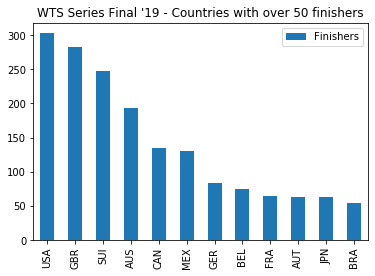

In [43]:
# plot countries with over 50 finishers
overfifty.plot.bar(title='WTS Series Final \'19 - Countries with over 50 finishers')

In [44]:
wtswc19.to_excel("wtswc19_output.xlsx")  